In [24]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

[(4, 23), (5, 19), (10, 24), (4, 17), (3, 16), (11, 25), (14, 24), (8, 22), (10, 21), (12, 21)] <class 'list'> 



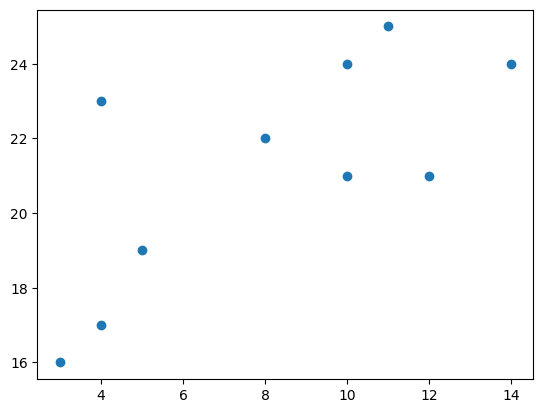

In [25]:
x1 = [4,5,10,4,3,11,14,8,10,12]
x2 = [23, 19,24,17,16,25,24,22,21,21]
classes = [0, 0, 1, 0, 0, 1,1,0,1,1]
plt.scatter(x1,x2)
data = list(zip(x1,x2))
print(data, type(data),'\n')

In [26]:
sc = StandardScaler()
data = sc.fit_transform(data)
data

array([[-1.11629218,  0.62254302],
       [-0.84402579, -0.76088591],
       [ 0.51730613,  0.96840025],
       [-1.11629218, -1.45260037],
       [-1.38855856, -1.79845761],
       [ 0.78957252,  1.31425748],
       [ 1.60637167,  0.96840025],
       [-0.02722664,  0.27668579],
       [ 0.51730613, -0.06917145],
       [ 1.0618389 , -0.06917145]])

In [27]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(data,classes)

KNeighborsClassifier(n_neighbors=1)

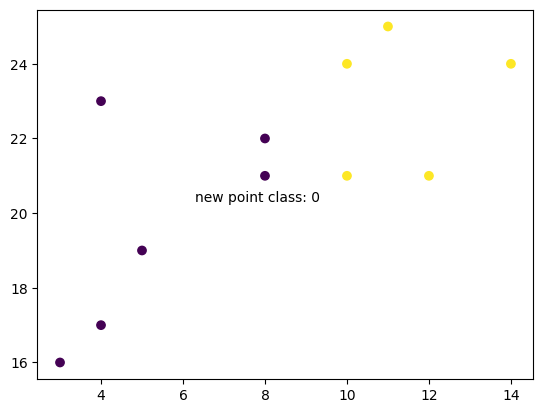

In [28]:
new_x = 8
new_y = 21
new_pt = [(new_x, new_y)]
new_pt =sc.fit_transform(new_pt)
prediction = knn.predict(new_pt)
plt.scatter(x1+[new_x], x2+[new_y], c=classes+[prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point class: {prediction[0]}")
plt.show()

# KNN on DATASET

In [29]:
d = pd.read_csv(r'diabetes.csv')
d

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [30]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [31]:
# to count number of null in data

d.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [32]:
#zero_not_accepted = ['Glucose','BloodPressure','SkinThickness','BMI','Insulin']

In [33]:
zero_not_accepted = list(d.columns)
zero_not_accepted

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [47]:
for column in zero_not_accepted:
    d[column] = d[column].replace(0, np.NaN)
    mean = int(d[column].mean(skipna = True))
    d[column] = d[column].replace(np.NaN, mean)
    
d

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,155.0,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,155.0,26.6,0.351,31,1.0
2,8.0,183.0,64.0,29.0,155.0,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,1.0
4,4.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,1.0
764,2.0,122.0,70.0,27.0,155.0,36.8,0.340,27,1.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,1.0
766,1.0,126.0,60.0,29.0,155.0,30.1,0.349,47,1.0


In [48]:
from sklearn.model_selection import train_test_split

attribute = d.iloc[:,:8]
attribute = np.array(attribute)
# attribute

In [49]:
classes = d.iloc[:,-1]
classes = np.array(classes)
# classes

In [57]:
# splitting dataset into train and test data sets

X_train,X_test,y_train,y_test = train_test_split(attribute, classes, test_size=0.2,random_state=20)

# preprocesing of data

sc1=StandardScaler()
X_train = sc1.fit_transform(X_train)
X_test = sc1.transform(X_test)


In [58]:
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train, y_train)
prediction = knn1.predict(X_test)
#len(prediction)

In [65]:
from sklearn.metrics import confusion_matrix,accuracy_score, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,prediction)
print(cm)
accuracy_score(y_test,prediction)

[[154]]


1.0

ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of labels (2).

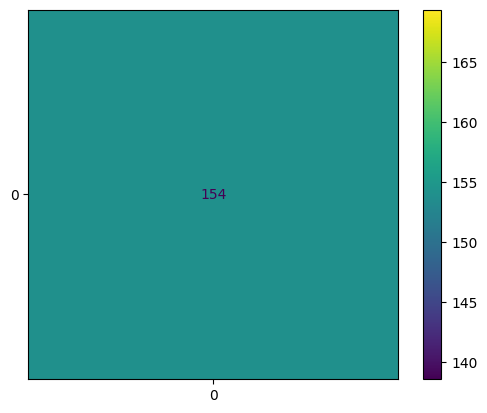

In [60]:
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[True,False])
cm_disp.plot()
plt.show()